# Aula I - Aprendizado por reforço

Neste notebook iremos implementar o algoritmo de aprendizado por reforço Q-Learning, utilizando ambiente fornecidos pelo [Open AI Gym](http://gym.openai.com/envs/).

## Parte 1 - Q-learning


Neste exemplo, implementaremos o algoritmo de aprendizado por refoço chamado Q-learning. 

Primeiramente, precisamos importar algumas bibliotecas.

In [8]:
import gym
import numpy as np
import matplotlib.pyplot as plt

Em nosso exemplo, tentaremos resolver o problema chamado Cliff Walking, apresentado na figura abaixo. Neste problema, o agente parte de S e deve chegar em G de uma forma eficiente, mas evitando o penhasco. Para cada passo, o agente recebe uma recompensa de -1. Caso o agente caia no penhasco, a recompensa é -100. O episódio termina quando o agente chega em G ou cai no penhasco. Naturalmente, o objetivo é chegar em G o mais rapidamente possível para maximizar sua recompensa.

![alt text](https://i.imgur.com/2IobMYw.png)

Para utilizar este ambiente com o Gym, basta executar o comando abaixo.

In [9]:
cliff_env = gym.make('CliffWalking-v0')

O ambiente pode ser reiniciado com a função `reset`. Podemos imprimir o estado atual do ambiente com a função `render`.

In [10]:
cliff_env.reset()
cliff_env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



O código abaixo implementa o algoritmo Q-learning. O pseudocódigo do Q-learning é apresentado abaixo.

![alt text](https://i.imgur.com/9yydGca.png)

Em nossa implementação, o algoritmo recebe um ambiente, uma quantidade de episódios, além dos parâmetros usuais $\alpha$ (taxa de aprendizado), $\gamma$ (taxa de desconto) e $\epsilon$ (taxa de exploração).

In [11]:
def Qlearning(environment, num_episodes=100, alpha=0.3, gamma=0.9, epsilon=1.0, decay_epsilon=0.1, max_epsilon=1.0, min_epsilon=0.01):
  
  # initializing the Q-table
  Q = np.zeros((environment.observation_space.n, environment.action_space.n))

  # additional lists to keep track of reward and epsilon values
  rewards = []
  epsilons = []

  # episodes
  for episode in range(num_episodes):
      
      # reset the environment to start a new episode
      state = environment.reset()

      # reward accumulated along episode
      accumulated_reward = 0
      
      # steps within current episode
      for step in range(100):
          
          # epsilon-greedy action selection
          # exploit with probability 1-epsilon
          if np.random.uniform(0, 1) > epsilon:
              action = np.argmax(Q[state,:])
              
          # explore with probability epsilon
          else:
              action = environment.action_space.sample()
              
          # perform the action and observe the new state and corresponding reward
          new_state, reward, done, info = environment.step(action)
          

          # update the Q-table
          Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])
          
          # update the accumulated reward
          accumulated_reward += reward

          # update the current state
          state = new_state
          
          # end the episode when it is done
          if done == True:
              break
      
      # decay exploration rate to ensure that the agent exploits more as it becomes experienced
      epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_epsilon*episode)
      
      # update the lists of rewards and epsilons
      rewards.append(accumulated_reward)
      epsilons.append(epsilon)

  # render the environment
  environment.render()
    
  # return the list of accumulated reward along episodes
  return rewards

Para utilizar o Q-learning, basta chamá-lo como segue. No exemplo abaixo, vamos executar o algoritmo por 100 episódios. Ao final, calculamos a recompensa média total (ao longo de todos episódios) e a final (ao longo dos últimos 10 episódios).

In [12]:
num_episodes=100
alpha=0.3
gamma=0.9
epsilon=1.0
decay_epsilon=0.1

# run Q-learning
rewards = Qlearning(cliff_env, num_episodes, alpha, gamma, epsilon, decay_epsilon)

# print results
print ("Average reward (all episodes): " + str(sum(rewards)/num_episodes))
print ("Average reward (last 10 episodes): " + str(sum(rewards[-10:])/10))

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

Average reward (all episodes): -125.44
Average reward (last 10 episodes): -19.2


Para avaliar o desempenho do algoritmo, podemos criar um gráfico da recompensa total por episódio.

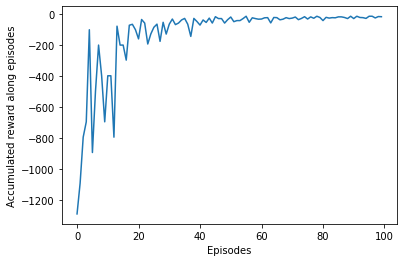

In [13]:
plt.plot(range(num_episodes), rewards)
plt.xlabel('Episodes')
plt.ylabel('Accumulated reward along episodes')
plt.show()

Com base no gráfico acima, podemos observar que o algoritmo converge para uma recompensa próxima de zero. Considerando que a recompensa máxima neste ambiente é -13, podemos dizer que o algoritmo convergiu para uma política próxima da ótima.

### Nota: 

Nesta implementação, utilizamos a biblioteca Gym para modelar o ambiente do problema Cliff Walking porque ela torna o código mais simples para compreender o funcionamento do algoritmo Q-Learning. Na atividade prática I, você precisará implementar a dinâmica do ambiente (que aqui é modelada pela biblioteca Gym). Para verificar um exemplo de implementação completa da dinâmica do ambiente do problema Cliff Walking, considere a implementação de Jeremy Zhang, disponibilizada no [Towards Data Science](https://towardsdatascience.com/reinforcement-learning-cliff-walking-implementation-e40ce98418d4).

### Exercício 1

Ajuste os parâmetros do algoritmo Q-learning para obter melhores resultados. Em seguida, rode o algoritmo com a melhor política aprendida, ou seja, escolhendo as ações de forma gulosa.

In [14]:
num_episodes=100
#alpha=0.3
alpha=1.0
gamma=0.9
#gamma=1.0
epsilon=1.0
decay_epsilon=0.999
#max_epsilon=1.0
max_epsilon=0.1
#min_epsilon=0.1
min_epsilon=0.0

# run Q-learning
rewards = Qlearning(cliff_env, num_episodes, alpha, gamma, epsilon, decay_epsilon, 
                    max_epsilon, min_epsilon)

# print results
print ("Average reward (all episodes): " + str(sum(rewards)/num_episodes))
print ("Average reward (last 10 episodes): " + str(sum(rewards[-10:])/10))
print ("Last reward: " + str(rewards[-1]))

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

Average reward (all episodes): -42.09
Average reward (last 10 episodes): -13.0
Last reward: -13
